# Schéma de Bernoulli

## Le jeu
On considère un jeu dans lequel on dispose d'un dé à six faces numérotées de $1$ à $6$ et d'une urne contenant 3 boules vertes, et 5 boules rouges. On lance tout d'abord le dé et on lit la configuration sur la face supérieure.
- Si le $1$ apparaît alors le joueur a gagné.
- Si un nombre pair apparaît alors le joueur a perdu.
- Si le nombre $3$ ou $5$ apparaît alors on tire une boule dans l'urne. Si on obtient une boule Rouge le joueur a gagné sinon, il perd.


## Simulation du lancé d'un dé

In [11]:
from random import *
def dé():
    return randint(1,8)

In [12]:
dé()


2

## Simulation du tirage d'une boule

In [13]:
from random import *
def boule():
    numBoule = randint(1,9)
    if numBoule <= 3 :
        return 'Verte'
    else :
        return 'Rouge'

In [14]:
boule()

'Verte'

## Simulation du lancé d'une partie

In [15]:
def partie():
    lancé = dé()
    if lancé == 1 :
        return 'Gagné'
    elif lancé == 2 or lancé == 4 or lancé == 6 :
        return 'Perdu'
    else :
        tirage = boule()
        if tirage =='Rouge':
            return 'Gagné'
        else :
            return 'Perdu'
        

In [16]:
partie()

'Gagné'

## Simulation de n parties et comptage du nombre de partie gagnées

In [17]:
def frequenceGain(n):
    nbSuccès=0
    for i in range(n):
        if partie() == 'Gagné':
            nbSuccès = nbSuccès+1
    return nbSuccès/n

In [18]:
frequenceGain(1000)

0.474

## Échantillon de taille N.

On simule N expériences de n lancés.

(array([ 3.,  4.,  9., 24., 18., 13., 12., 10.,  2.,  5.]),
 array([0.3  , 0.323, 0.346, 0.369, 0.392, 0.415, 0.438, 0.461, 0.484,
        0.507, 0.53 ]),
 <a list of 10 Patch objects>)

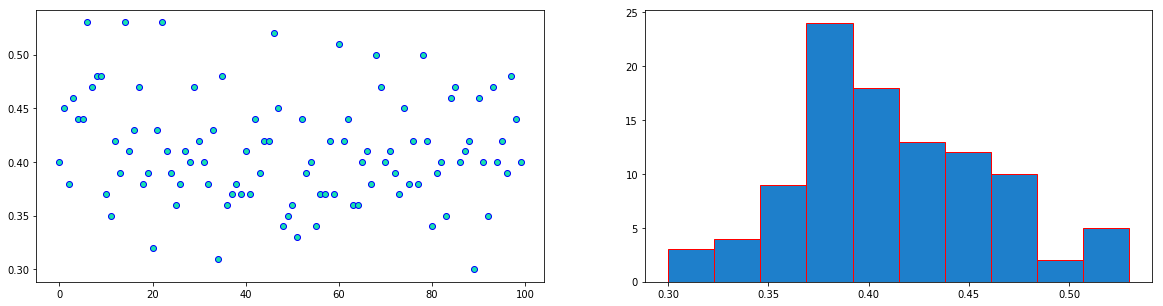

In [19]:
from pylab import *

N=100
n=100
fig, (ax1, ax2) = subplots(1, 2,figsize=(20, 5))
def SimulEchantillon(N,n):
    echantillon=[]
    for i in range(N):
        echantillon.append(frequenceGain(n))
    return echantillon

liste = SimulEchantillon(N,n)

ax1.plot(liste, 'bo', markerfacecolor='#19e2ad')
ax2.hist(liste,color = '#1e7fcb',edgecolor = 'red')

## Bornes des intervalles de confiances

La proportion de points entre [p-1s,p+1s] est  0.68
La proportion de points entre [p-2s,p+2s] est  0.94
La proportion de points entre [p-3s,p+3s] est  1.0


(array([ 4.,  1.,  9., 17., 16., 20., 15.,  8.,  6.,  4.]),
 array([0.3  , 0.323, 0.346, 0.369, 0.392, 0.415, 0.438, 0.461, 0.484,
        0.507, 0.53 ]),
 <a list of 10 Patch objects>)

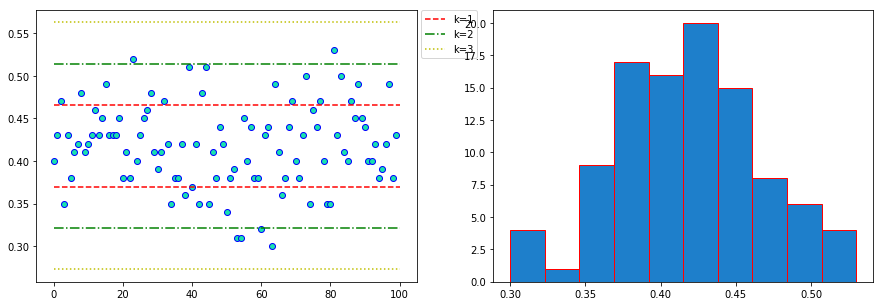

In [10]:
from pylab import *
from numpy import *

N=100
n=100

def bornes(L,k):
    return [mean(L)-k*std(L),mean(L)+k*std(L)]

def frequencePoints(L,k):
    n = 0
    inf,sup = bornes(L,k)
    points = [x for x in L if x>=inf and x<=sup]
    return len(points)/len(L)

fig, (ax1, ax2) = subplots(1, 2,figsize=(15,5))
def SimulEchantillon(N,n):
    echantillon=[]
    for i in range(N):
        echantillon.append(frequenceGain(n))
    return echantillon

liste = SimulEchantillon(N,n)

inf1,sup1 =  bornes(liste,1)
inf2,sup2 =  bornes(liste,2)
inf3,sup3 =  bornes(liste,3)

for i in range(1,4):
    print("La proportion de points entre [p-{0}s,p+{0}s] est ".format(i),frequencePoints(liste,i))
    
ax1.plot(liste, 'bo', markerfacecolor='#19e2ad')
ax1.plot([0,N],[inf1,inf1],'r--',label='k=1')
ax1.plot([0,N],[sup1,sup1],'r--')
ax1.plot([0,N],[inf2,inf2],'g-.',label='k=2')
ax1.plot([0,N],[sup2,sup2],'g-.')
ax1.plot([0,N],[inf3,inf3],'y:',label='k=3')
ax1.plot([0,N],[sup3,sup3],'y:')
ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax2.hist(liste,color = '#1e7fcb',edgecolor = 'red')

## Convergence

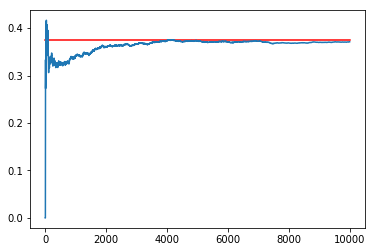

In [11]:
def cumul(n):
    partiesGagnees = []
    frequence = []
    for i in range(1,n+1):
        if partie()=='Gagné':
            partiesGagnees.append(1)
        else :
            partiesGagnees.append(0)
        frequence.append(sum(partiesGagnees)/(i))
    return frequence
n=10000       
F = cumul(n)
p = 9/24
plot([0,n],[p,p],'r')
plot(F)

## Annimation

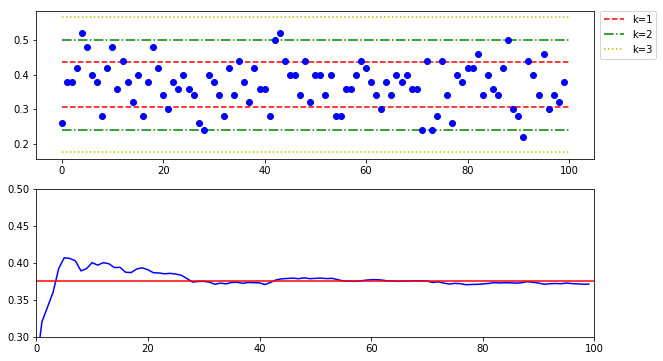

In [13]:
import matplotlib.animation
from IPython.display import HTML

#Constantes
N=100
n=50
p = 9/24

liste = SimulEchantillon(N,n)

inf1,sup1 =  bornes(liste,1)
inf2,sup2 =  bornes(liste,2)
inf3,sup3 =  bornes(liste,3)

#paramètres figure
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10, 6))

#ax1.plot(echantillon,'bo')
ax1.plot([0,N],[inf1,inf1],'r--',label='k=1')
ax1.plot([0,N],[sup1,sup1],'r--')
ax1.plot([0,N],[inf2,inf2],'g-.',label='k=2')
ax1.plot([0,N],[sup2,sup2],'g-.')
ax1.plot([0,N],[inf3,inf3],'y:',label='k=3')
ax1.plot([0,N],[sup3,sup3],'y:')
points, = ax1.plot([],[],'bo')
conv, = ax2.plot([],[],'b')
ax2.set_xlim((0, N))
ax2.set_ylim((0.3, .5))
ax2.plot([0,N],[p,p],'r')
ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
freq = []

def init():
    points.set_data([], [])
    conv.set_data([], [])
    return (points,)

def animate(i):
    global echantillon,freq
    points.set_data([range(i+1),liste[:i+1]])
    freq.append(sum(liste[:i+1])/(i+1))
    conv.set_data([range(i+1),freq])
    return (points,)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N,init_func=init,blit=True)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())